# Lab 10

## I. Hill Climbing


The Hill Climbing Method is a simple optimization algorithm that tries to find the optimal solution to a problem by iteratively improving the current solution. It is a local search algorithm, which means that it only considers the solutions that are in the neighborhood of the current solution.

Here's how the Hill Climbing Method works:

1. Start with an initial state -- a candidate to the solution of the problem.

2. Evaluate the current state to determine its quality or fitness.

3. Generate a set of neighboring states by making small modifications to the current one.

3. Evaluate the fitness of each neighboring state.

4. Select the best neighboring state and make it the new current one.

5. Repeat steps 3 to 5 until no further improvement can be made or a predefined stopping criterion is met.

One of the main advantages of the Hill Climbing Method is its simplicity and ease of implementation. 

Consider the Bukin funcion N6, from the basic optimisation benchmark set:

$$f(x,y) =  100 \sqrt{|y-0.01 x^2|}+ 0.01 |x+10|.$$

For $-15 \leqq x \leqq -5$ and $-3 \leqq y \leqq 3$ we have a minimum point $f(-10, 1) = 0$.


*Ex. 1:*

Implement a function $f$ for this function and represent it graphic using matplotlib.

*Ex. 2:* 

Write a Hill Climbing algorithm that finds this functions minimum.

Hints: 

define a state, define a neighbour, choose a proper stop criteria before implementing the algorithm.

*Ex. 3:* for 1 point 

Implement a hill climbing algorithm for the knapsack problem. 

Hints:
For n elements:

we begin with an empty string of n zeros.

a neighbour is constructed by switching of zero into an one at a position in the array

Does it find the optimum? 



*Ex. 4:* for 1 point

Improve it to increase the chances of finding the solution.  

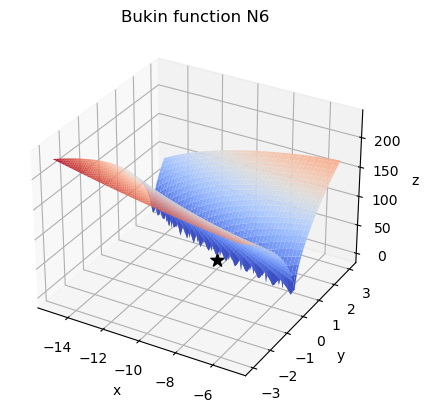

In [7]:
# Ex. 1:

import numpy as np
import matplotlib.pyplot as plt

def bukin(x, y):
    term1 = 100 * np.sqrt(np.abs(y - 0.01 * x**2))
    term2 = 0.01 * np.abs(x + 10)
    return term1 + term2

x = np.linspace(-15, -5, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)
Z = bukin(X, Y)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap='coolwarm')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Bukin function N6')

ax.scatter(-10, 1, 0, color='black', marker='*', s=100)

plt.show()

In [29]:
#Ex. 2:

import numpy as np

def bukin(x, y):
    term1 = 100 * np.sqrt(np.abs(y - 0.01 * x**2))
    term2 = 0.01 * np.abs(x + 10)
    return term1 + term2

def create_state():
    x = np.random.uniform(-15, -5)
    y = np.random.uniform(-3, 3)
    return (x, y)

def get_neighbour(state, radius):
    x, y = state
    new_x = np.random.uniform(x - radius, x + radius)
    new_y = np.random.uniform(y - radius, y + radius)
    return (new_x, new_y)

def stop_criteria(iteration, max_iterations):
    return iteration >= max_iterations

def hill_climbing(bukin_func, create_state, get_neighbour, stop_criteria, max_iterations):
    current_state = create_state()
    current_value = bukin_func(*current_state)
    iteration = 0
    radius = 1.0
    while not stop_criteria(iteration, max_iterations):
        neighbour = get_neighbour(current_state, radius)
        neighbour_value = bukin_func(*neighbour)
        if neighbour_value < current_value:
            current_state = neighbour
            current_value = neighbour_value
            radius = 1.0
        else:
            radius *= 0.99
        iteration += 1
    return current_state, current_value

best_state, best_value = hill_climbing(bukin_func=bukin, create_state=create_state,
                                       get_neighbour=get_neighbour, stop_criteria=stop_criteria,
                                       max_iterations=10000)
print(f"Best state: {best_state}")
print(f"Best value: {best_value}")

Best state: (-10.135792678324684, 1.0273429414144168)
Best value: 0.010967616780562128


In [30]:
#Ex. 3:

import numpy as np

weights = np.array([10, 20, 30, 40, 50])
values = np.array([20, 30, 66, 40, 60])
capacity = 100

def create_state(n):
    return np.zeros(n)

def get_neighbour(state):
    new_state = state.copy()
    idx = np.random.randint(len(state))
    new_state[idx] = 1 - new_state[idx]
    return new_state

def stop_criteria(iteration, max_iterations):
    return iteration >= max_iterations

def knapsack_value(state):
    total_weight = np.sum(state * weights)
    total_value = np.sum(state * values)
    if total_weight > capacity:
        return -np.inf
    else:
        return total_value

def hill_climbing_knapsack(create_state, get_neighbour, stop_criteria, max_iterations):
    current_state = create_state(len(weights))
    current_value = knapsack_value(current_state)
    iteration = 0
    while not stop_criteria(iteration, max_iterations):
        neighbour = get_neighbour(current_state)
        neighbour_value = knapsack_value(neighbour)
        if neighbour_value > current_value:
            current_state = neighbour
            current_value = neighbour_value
        iteration += 1
    return current_state, current_value

best_state, best_value = hill_climbing_knapsack(create_state=create_state, get_neighbour=get_neighbour,
                                                 stop_criteria=stop_criteria, max_iterations=10000)
print(f"Best state: {best_state}")
print(f"Best value: {best_value}")

#The algorithm does not always find the optimal solution. 
#This is because the Hill Climbing algorithm is a local search algorithm that tends to get stuck in local optima.

Best state: [0. 1. 1. 0. 1.]
Best value: 156.0


In [32]:
#Ex. 4:

import numpy as np

weights = np.array([10, 20, 30, 40, 50])
values = np.array([20, 30, 66, 40, 60])
capacity = 100

def create_state(n):
    return np.zeros(n)

def get_neighbour(state):
    new_state = state.copy()
    idx = np.random.randint(len(state))
    new_state[idx] = 1 - new_state[idx]
    return new_state

def stop_criteria(iteration, max_iterations):
    return iteration >= max_iterations

def knapsack_value(state):
    total_weight = np.sum(state * weights)
    total_value = np.sum(state * values)
    if total_weight > capacity:
        return -np.inf
    else:
        return total_value
    
def hill_climbing_knapsack(create_state, get_neighbour, stop_criteria, max_iterations, num_restarts):
    best_state = None
    best_value = -np.inf
    for i in range(num_restarts):
        current_state = create_state(len(weights))
        current_value = knapsack_value(current_state)
        iteration = 0
        while not stop_criteria(iteration, max_iterations):
            neighbour = get_neighbour(current_state)
            neighbour_value = knapsack_value(neighbour)
            if neighbour_value > current_value:
                current_state = neighbour
                current_value = neighbour_value
            iteration += 1
        if current_value > best_value:
            best_state = current_state
            best_value = current_value
    return best_state, best_value

best_state, best_value = hill_climbing_knapsack(create_state=create_state, get_neighbour=get_neighbour,
                                                 stop_criteria=stop_criteria, max_iterations=10000, num_restarts=10)
print(f"Best state: {best_state}")
print(f"Best value: {best_value}")

Best state: [1. 1. 1. 1. 0.]
Best value: 156.0
